'''###########################################################################
This python script is to produce textbook figures in Undergraduate Econometrics 
textbook of Professor Diebold. 

Author: Theodore Caputi, Donato Onorato, JoonYup Park, Sarah Winton
Date: 5/20/2017
Project: Undergraduate Econometrics Textbook (Wages)
Contact: joonyup@wharton.upenn.edu

Updates: 
    Finalized 8/15/2017

Instructions:
    
    1. I altered the input for colab Cloud {JGS}
    
    2. In the "House Keeping" section, the required packages are listed. Please run those 
        lines before running the script. 
    
    3. This python scipt is written under Python version 3.6.0. 
    
Notes:

###########################################################################'''


In [0]:
# House Keeping ---------------------------------------------------------------

# %reset #Run this command before the run if you wish to clear directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as stm
import scipy.stats as stats
import matplotlib.mlab as mlab #for drawing kernel density


Inserted code to load data into colab
First get the file


In [18]:
## Alterations needed to execute a file downloaded locally on colab CLOUD
import io
from google.colab import files
uploaded = files.upload()

Saving DataWage.txt to DataWage (1).txt


In [0]:
# Load into a dataframe
data = pd.read_csv(io.BytesIO(uploaded['DataWage.txt']))

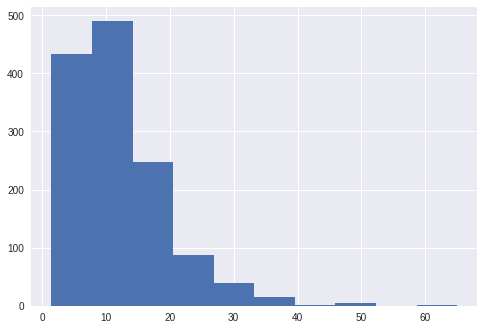

In [20]:
##Distributions of Wages 
hist_wage = plt.hist(data['WAGE'])
plt.show()

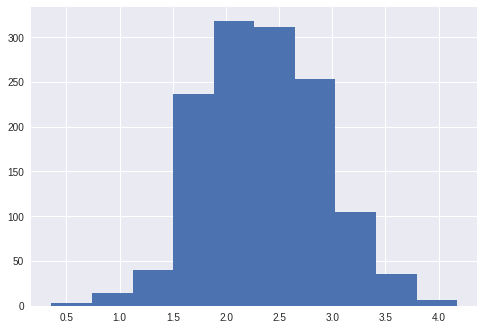

In [21]:
##Distribution of Log Wages
hist_lnwage = plt.hist(data['LNWAGE'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


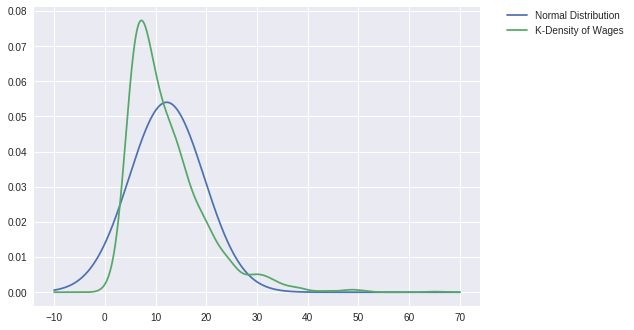

In [22]:
##Kernel density plot for Wages
##Plots are mislabeled // I corrected {JGS}
mu = np.mean(data['WAGE'])
sigma = np.sqrt(np.var(data['WAGE']))
x = np.linspace(-10,70,10001)

kden_wage = stats.gaussian_kde(data['WAGE']).evaluate(x)

plt.plot(x, mlab.normpdf(x,mu,sigma), label="Normal Distribution")
plt.plot(x, kden_wage, label="K-Density of Wages")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


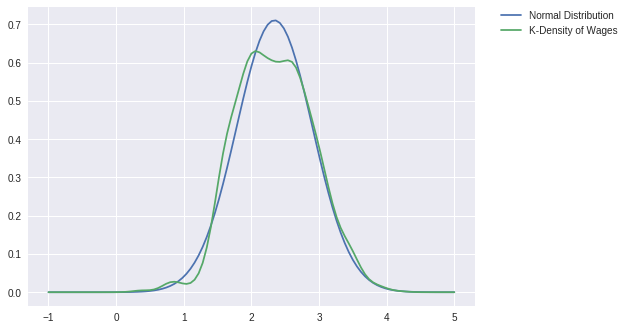

In [23]:
##Kernel density plot for Log Wages
##Plots are mislabeled // I corrected {JGS}
mu = np.mean(data['LNWAGE'])
sigma = np.sqrt(np.var(data['LNWAGE']))
x = np.linspace(-1,5,101)

kden_lnwage = stats.gaussian_kde(data['LNWAGE']).evaluate(x)

plt.plot(x, mlab.normpdf(x,mu,sigma), label="Normal Distribution")
plt.plot(x, kden_lnwage, label="K-Density of Wages")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

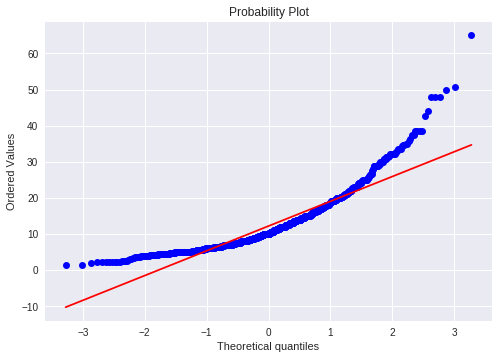

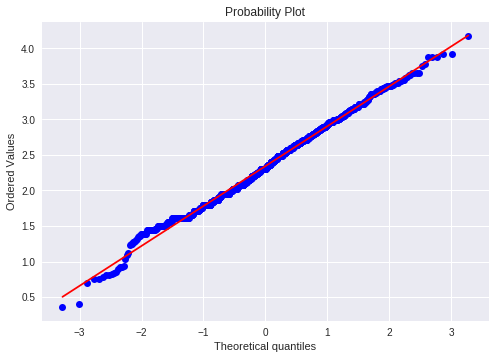

In [24]:
##QQ-plot for Wages and Log Wages
stats.probplot(data['WAGE'], dist="norm", plot=plt)
plt.show()

stats.probplot(data['LNWAGE'], dist="norm", plot=plt)
plt.show()


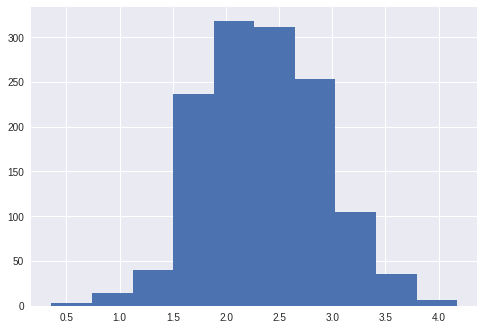

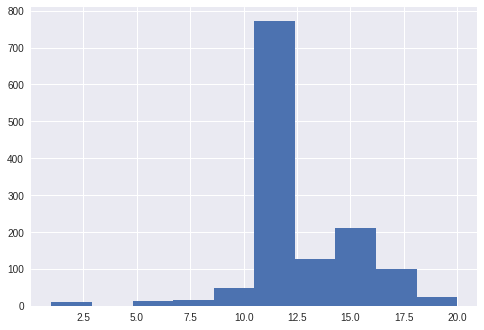

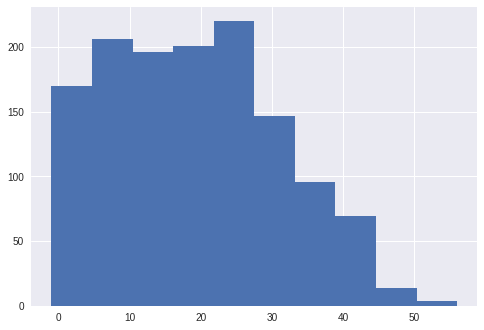

In [25]:
##Histograms for Log Wages, Education, and Experience
hist_lnwage = plt.hist(data['LNWAGE'])
plt.show()

hist_educ = plt.hist(data['EDUC'])
plt.show()

hist_exper = plt.hist(data['EXPER'])
plt.show()


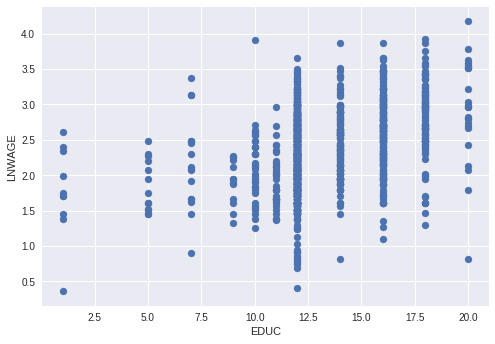

In [26]:
##Scatter plot for Log Wage on Education
plt.scatter(data['EDUC'], data['LNWAGE'])
plt.xlabel('EDUC')
plt.ylabel('LNWAGE')
plt.show()

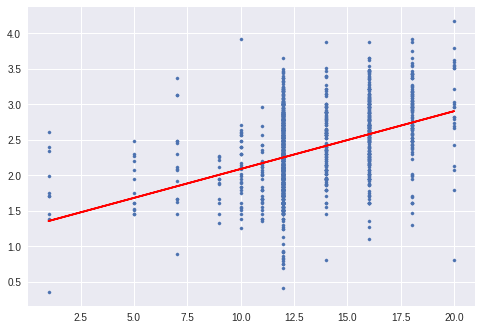

In [27]:
##Fitted line through scatter plot for Log Wage on Education
m,b = np.polyfit(data['EDUC'],data['LNWAGE'],deg=1)
plt.scatter(data['EDUC'], data['LNWAGE'], s=10)
plt.plot(data['EDUC'], m*data['EDUC'] + b, color='r')
plt.show()

In [28]:
##Regression1: LNWAGE ~ EDUC + EXPER
X = data[['EDUC','EXPER']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg1 = sm.OLS(y,X).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LNWAGE   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     199.6
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           1.80e-76
Time:                        18:22:43   Log-Likelihood:                -938.24
No. Observations:                1323   AIC:                             1882.
Df Residuals:                    1320   BIC:                             1898.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8674      0.075     11.514      0.000       0.720       1.015
EDUC           0.0932      0.005     18.480      0.000       0.083       0.103
EXPER          0.0131      0.001     11.262      0.000       0.011       0.015
==============================================================================
Omnibus:                       16.187   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.614
Skew:                          -0.182   Prob(JB):                     5.51e-05
Kurtosis:                       3.473   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

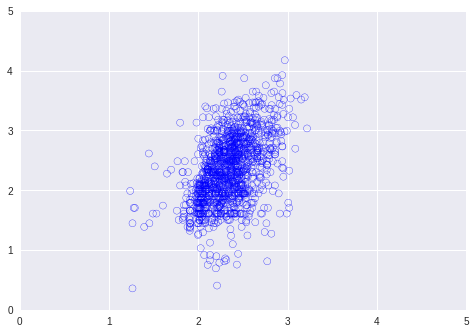

In [29]:
##Plot fitted values from Regression1
reg1_fit = reg1.fittedvalues
plt.scatter(reg1_fit, data['LNWAGE'], facecolors='none', edgecolors='b')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

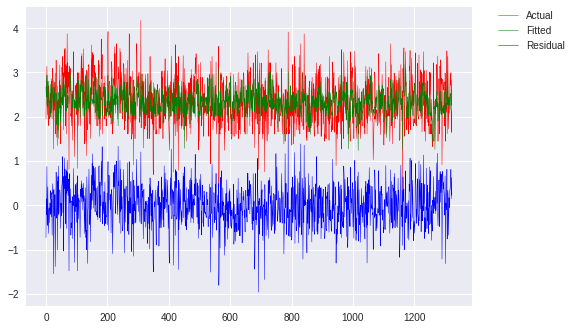

In [0]:
##Plot of residuals and Fitted values superimposed on #residuals
reg1_actual = data['LNWAGE']
reg1_resid = reg1.resid

plt.plot(reg1_actual, color="red", linewidth=0.5, label="Actual")
plt.plot(reg1_fit, color="green", linewidth=0.5, label="Fitted")
plt.plot(reg1_resid, color="blue", linewidth=0.5, label="Residual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

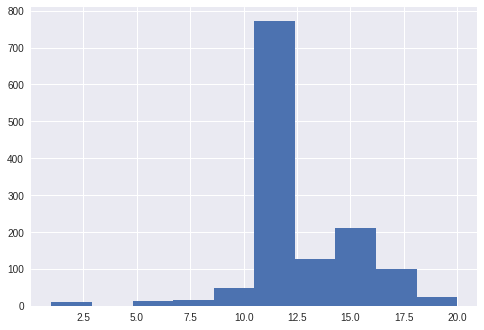

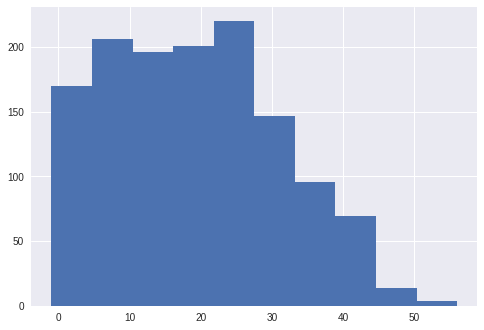

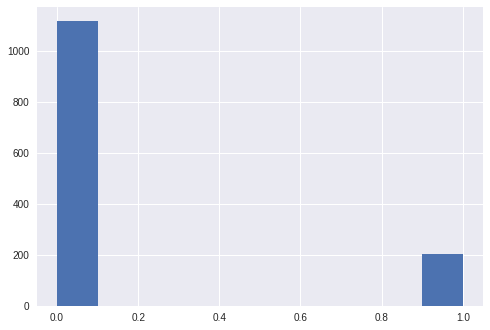

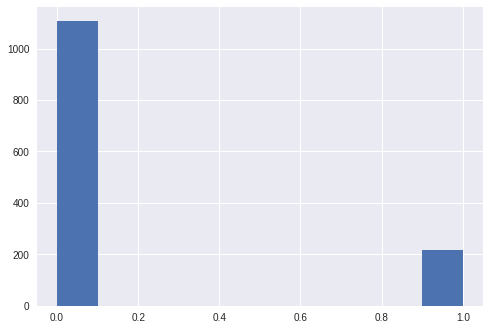

In [30]:
##Histograms for EDUC, EXPER, NONWHITE, and UNION
hist_wage = plt.hist(data['EDUC'])
plt.show()

hist_wage = plt.hist(data['EXPER'])
plt.show()

hist_wage = plt.hist(data['NONWHITE'])
plt.show()

hist_wage = plt.hist(data['UNION'])
plt.show()

In [0]:
##Regression2: LNWAGE ~ FEMALE, NONWHITE, UNION, EDUC, EXPER
X = data[['FEMALE','NONWHITE','UNION','EDUC','EXPER']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg2 = sm.OLS(y,X).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LNWAGE   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     117.2
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          1.29e-102
Time:                        17:31:39   Log-Likelihood:                -869.64
No. Observations:                1323   AIC:                             1751.
Df Residuals:                    1317   BIC:                             1782.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0004      0.073     13.670      0.000       0.857       1.144
FEMALE        -0.2375      0.026     -9.148      0.000      -0.288      -0.187
NONWHITE      -0.0853      0.036     -2.383      0.017      -0.155      -0.015
UNION          0.2234      0.035      6.327      0.000       0.154       0.293
EDUC           0.0908      0.005     18.863      0.000       0.081       0.100
EXPER          0.0127      0.001     11.356      0.000       0.011       0.015
==============================================================================
Omnibus:                       18.405   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.700
Skew:                          -0.181   Prob(JB):                     7.14e-06
Kurtosis:                       3.547   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

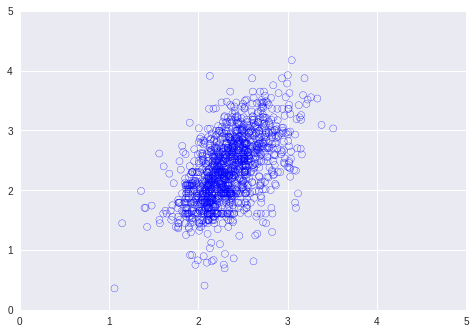

In [0]:
##Plot fitted values from Regression2
reg2_fit = reg2.fittedvalues
plt.scatter(reg2_fit, data['LNWAGE'], facecolors='none', edgecolors='b')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()


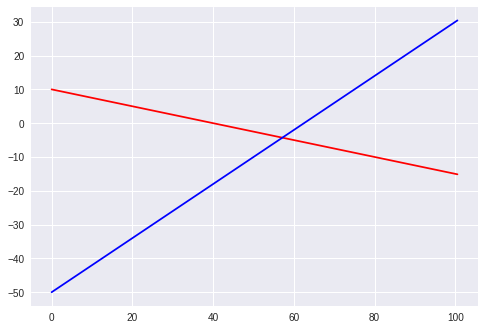

In [0]:
##Time and Trend
time = np.arange(0,101,0.5)
trend = 10 - 0.25 * time
BB = -50 + 0.8 * time
plt.plot(time,trend,color='r')
plt.plot(time,BB,color='b')
plt.show()

In [0]:
##Regression3: LNWAGE ~ EDUC, EDUC^2, EXP, EXP^2, EDUCxEXPER, FEMALE, UNION, NONWHITE
data['EDUC2'] = data['EDUC'] ** 2
data['EXPER2'] = data['EXPER'] ** 2
data['EDUC_X_EXPER'] = data['EDUC'] * data['EXPER']
X = data[['EDUC','EDUC2','EXPER','EXPER2','EDUC_X_EXPER','FEMALE','UNION','NONWHITE']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg3 = sm.OLS(y,X).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LNWAGE   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     85.78
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          2.50e-114
Time:                        17:38:02   Log-Likelihood:                -835.09
No. Observations:                1323   AIC:                             1688.
Df Residuals:                    1314   BIC:                             1735.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4732      0.241      1.967      0.049       0.001       0.945
EDUC             0.1097      0.029      3.793      0.000       0.053       0.166
EDUC2            0.0005      0.001      0.560      0.576      -0.001       0.002
EXPER            0.0644      0.008      8.419      0.000       0.049       0.079
EXPER2          -0.0007   8.86e-05     -7.962      0.000      -0.001      -0.001
EDUC_X_EXPER    -0.0018      0.000     -4.173      0.000      -0.003      -0.001
FEMALE          -0.2377      0.026     -9.319      0.000      -0.288      -0.188
UNION            0.2030      0.035      5.871      0.000       0.135       0.271
NONWHITE        -0.0950      0.035     -2.720      0.007      -0.164      -0.027
==============================================================================
Omnibus:                       28.758   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.581
Skew:                          -0.231   Prob(JB):                     1.54e-09
Kurtosis:                       3.723   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
##Regression3 w/ dummy interactions: LNWAGE ~ EDUC, EDUC^2, EXP, EXP^2, EDUCxEXPER, FEMALE, UNION, NONWHITE, FEMALExUNION, FEMALExNONWHITE, UNIONxNONWHITE 
data['FEMALE_X_UNION'] = data['FEMALE'] * data['UNION']
data['FEMALE_X_NONWHITE'] = data['FEMALE'] * data['NONWHITE']
data['UNION_X_NONWHITE'] = data['UNION'] * data['NONWHITE']
X = data[['EDUC','EXPER','FEMALE','UNION','NONWHITE','FEMALE_X_UNION','FEMALE_X_NONWHITE','UNION_X_NONWHITE']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg3_wDummyInt = sm.OLS(y,X).fit()
reg3_wDummyInt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LNWAGE   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     73.62
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          3.10e-100
Time:                        17:38:56   Log-Likelihood:                -868.08
No. Observations:                1323   AIC:                             1754.
Df Residuals:                    1314   BIC:                             1801.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0115      0.074     13.707      0.000       0.867       1.156
EDUC                  0.0908      0.005     18.842      0.000       0.081       0.100
EXPER                 0.0127      0.001     11.317      0.000       0.010       0.015
FEMALE               -0.2576      0.030     -8.552      0.000      -0.317      -0.199
UNION                 0.2169      0.047      4.567      0.000       0.124       0.310
NONWHITE             -0.1576      0.056     -2.792      0.005      -0.268      -0.047
FEMALE_X_UNION        0.0039      0.072      0.054      0.957      -0.137       0.145
FEMALE_X_NONWHITE     0.1256      0.072      1.749      0.080      -0.015       0.266
UNION_X_NONWHITE      0.0177      0.091      0.194      0.846      -0.161       0.197
==============================================================================
Omnibus:                       18.022   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.216
Skew:                          -0.177   Prob(JB):                     9.09e-06
Kurtosis:                       3.544   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
##Regression4: combining several of the previous regressions
X = data[['EDUC','EDUC2','EXPER','EXPER2','EDUC_X_EXPER','FEMALE','UNION','NONWHITE','FEMALE_X_UNION','FEMALE_X_NONWHITE','UNION_X_NONWHITE']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg4 = sm.OLS(y,X).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LNWAGE   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     62.60
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          5.15e-112
Time:                        17:39:18   Log-Likelihood:                -833.80
No. Observations:                1323   AIC:                             1692.
Df Residuals:                    1311   BIC:                             1754.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4830      0.241      2.005      0.045       0.010       0.956
EDUC                  0.1095      0.029      3.776      0.000       0.053       0.166
EDUC2                 0.0005      0.001      0.574      0.566      -0.001       0.002
EXPER                 0.0643      0.008      8.397      0.000       0.049       0.079
EXPER2               -0.0007   8.87e-05     -7.904      0.000      -0.001      -0.001
EDUC_X_EXPER         -0.0018      0.000     -4.186      0.000      -0.003      -0.001
FEMALE               -0.2529      0.030     -8.528      0.000      -0.311      -0.195
UNION                 0.2009      0.047      4.314      0.000       0.110       0.292
NONWHITE             -0.1615      0.055     -2.932      0.003      -0.270      -0.053
FEMALE_X_UNION       -0.0130      0.071     -0.183      0.855      -0.152       0.126
FEMALE_X_NONWHITE     0.1103      0.070      1.574      0.116      -0.027       0.248
UNION_X_NONWHITE      0.0332      0.089      0.372      0.710      -0.142       0.208
==============================================================================
Omnibus:                       28.827   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.847
Skew:                          -0.230   Prob(JB):                     1.35e-09
Kurtosis:                       3.727   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

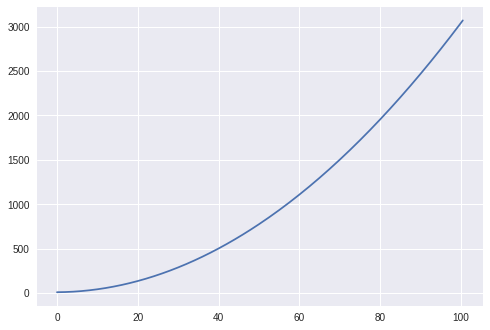

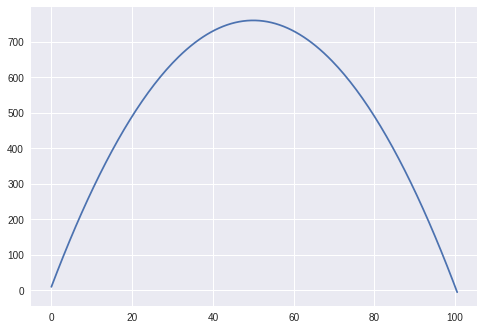

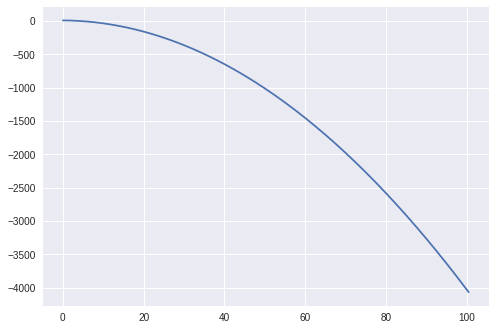

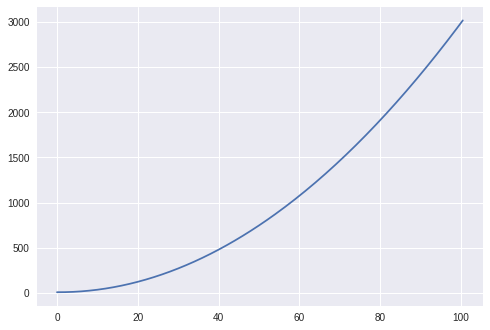

In [0]:
##Plots of different time trends
fig_a = 10 + 0.3*time + 0.3*(time**2)
plt.plot(time,fig_a)
plt.show()

fig_b = 10 + 30*time - 0.3*(time**2)
plt.plot(time,fig_b)
plt.show()

fig_c = 10 - 0.4*time - 0.4*(time**2)
plt.plot(time,fig_c)
plt.show()

fig_d = 10 - 0.25*time + 0.3*(time**2)
plt.plot(time,fig_d)
plt.show()

In [0]:
##Regression5: LNWAGE~EDUC, EXPER, EXPER^2, EDUCxEXPER, FEMALE, UNION, NONWHITE
X = data[['EDUC','EXPER','EXPER2','EDUC_X_EXPER','FEMALE','UNION','NONWHITE']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg5 = sm.OLS(y,X).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LNWAGE   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     98.04
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          2.84e-115
Time:                        17:40:03   Log-Likelihood:                -835.25
No. Observations:                1323   AIC:                             1687.
Df Residuals:                    1315   BIC:                             1728.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3605      0.132      2.736      0.006       0.102       0.619
EDUC             0.1250      0.009     13.608      0.000       0.107       0.143
EXPER            0.0661      0.007      9.425      0.000       0.052       0.080
EXPER2          -0.0007   8.82e-05     -8.042      0.000      -0.001      -0.001
EDUC_X_EXPER    -0.0019      0.000     -5.078      0.000      -0.003      -0.001
FEMALE          -0.2394      0.025     -9.450      0.000      -0.289      -0.190
UNION            0.2026      0.035      5.863      0.000       0.135       0.270
NONWHITE        -0.0949      0.035     -2.718      0.007      -0.163      -0.026
==============================================================================
Omnibus:                       28.154   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.497
Skew:                          -0.229   Prob(JB):                     2.65e-09
Kurtosis:                       3.712   Cond. No.                     8.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

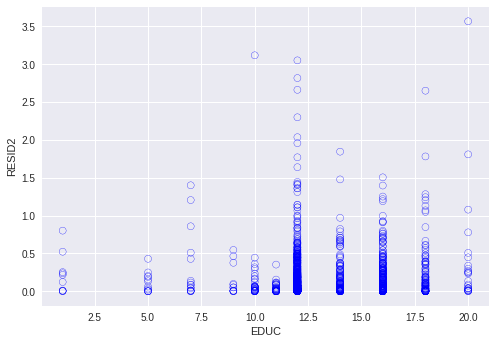

In [0]:

##Plot residual^2 from Regression5
reg5_resid = reg5.resid
reg5_resid2 = reg5_resid**2
plt.scatter(data['EDUC'],reg5_resid2, facecolors='none', edgecolors='b')
plt.xlabel('EDUC')
plt.ylabel('RESID2')
plt.show()

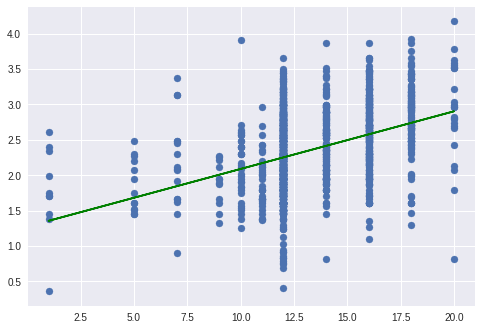

In [0]:
##OLS Regression: LNWAGE ~ EDUC
X = data[['EDUC']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg_OLS = sm.OLS(y,X).fit()
reg_OLS.summary()

reg_OLS_fit = reg_OLS.fittedvalues
plt.scatter(data['EDUC'], data['LNWAGE'])
plt.plot(data['EDUC'], reg_OLS_fit, color='green')
plt.show()

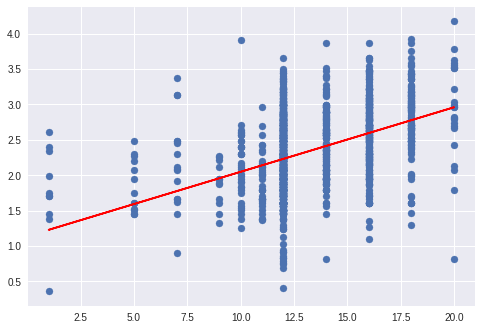

In [0]:
##LAD Regression: LNWAGE ~ EDUC
reg_LAD = sm.quantreg('LNWAGE ~ EDUC', data=data).fit(q=0.5)
reg_LAD.summary()

reg_LAD_fit = reg_LAD.fittedvalues
plt.scatter(data['EDUC'], data['LNWAGE'])
plt.plot(data['EDUC'], reg_LAD_fit, color='red')
plt.show()

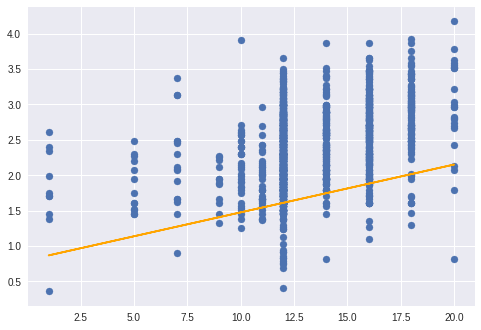

In [0]:
##10-percentile Regression: LNWAGE ~ EDUC
reg_10pct = sm.quantreg('LNWAGE ~ EDUC', data=data).fit(q=0.1)
reg_10pct.summary()

reg_10pct_fit = reg_10pct.fittedvalues
plt.scatter(data['EDUC'], data['LNWAGE'])
plt.plot(data['EDUC'], reg_10pct_fit, color='orange')
plt.show()

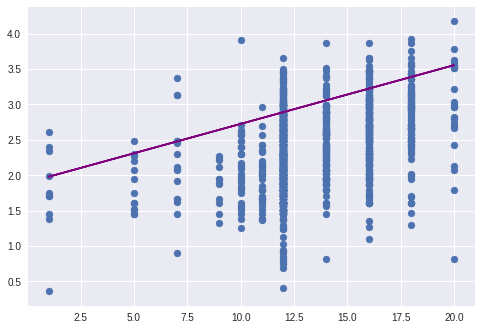

In [0]:
##90-percentile Regression: LNWAGE ~ EDUC
reg_90pct = sm.quantreg('LNWAGE ~ EDUC', data=data).fit(q=0.9)
reg_90pct.summary()

reg_90pct_fit = reg_90pct.fittedvalues
plt.scatter(data['EDUC'], data['LNWAGE'])
plt.plot(data['EDUC'], reg_90pct_fit, color='purple')
plt.show()

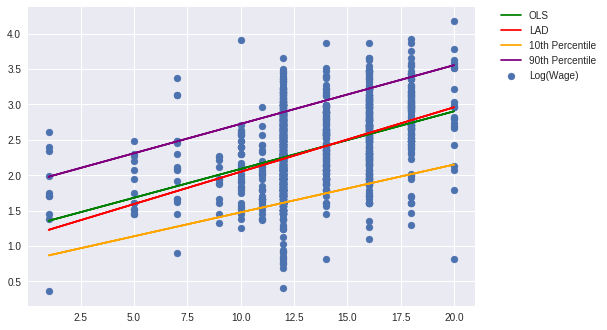

In [0]:
##Comparison of regressions with different loss functions
plt.scatter(data['EDUC'], data['LNWAGE'], label="Log(Wage)")
plt.plot(data['EDUC'], reg_OLS_fit, color='green', label="OLS")
plt.plot(data['EDUC'], reg_LAD_fit, color='red', label="LAD")
plt.plot(data['EDUC'], reg_10pct_fit, color='orange', label="10th Percentile")
plt.plot(data['EDUC'], reg_90pct_fit, color='purple', label="90th Percentile")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [0]:
##Leave-one-out Plot of Coefficients 
#Get original regression coefficient of EDUC
X = data[['EDUC']]
X = stm.add_constant(X)
y = data['LNWAGE']
reg_LOO = sm.OLS(y,X).fit()
b_orig = reg_LOO.params['EDUC']

n = len(data)

In [0]:
#Initiate a vector to store LOO coefficients
b_LOO_coef_change = np.zeros(shape=(n,1))

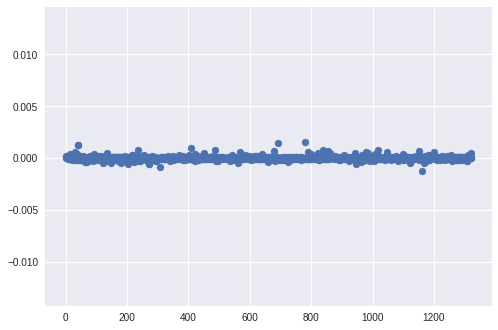

In [0]:
#Loop over all observations, excluding one by one
for i in range(0,n-1):
    
    short_data = data.drop(data.index[[i]])    
    
    X = short_data[['EDUC']]
    X = stm.add_constant(X)
    y = short_data['LNWAGE']   
    
    reg_short_LOO = sm.OLS(y,X).fit()
    b_LOO_coef_change[i] = reg_short_LOO.params['EDUC'] - b_orig

    
plt.scatter(range(0,1323), b_LOO_coef_change)  

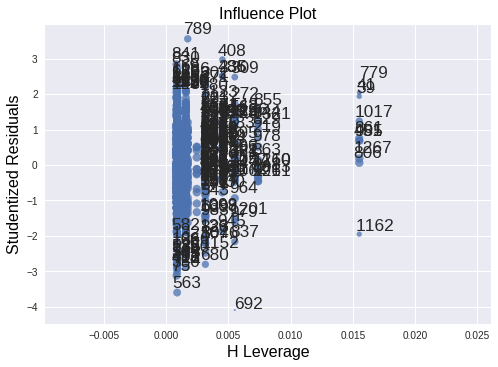

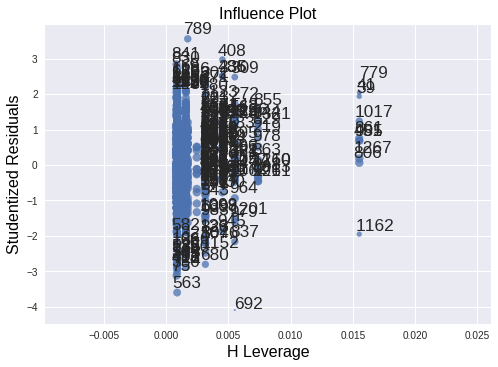

In [0]:
##leverage 
stm.graphics.influence_plot(reg_LOO, size=0)